<a href="https://colab.research.google.com/github/Manjunatha184/Startup-Fund-Analyzer/blob/Master/Startup_Fund_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
class StartupAnalysis:
    def __init__(self, df):
        self.df = df
        self.clean_data()

    def clean_data(self):
      self.df.rename(columns={
        'Date dd/mm/yyyy': 'date',
        'Startup Name': 'company_name',
        'Industry Vertical': 'industry',
        'City  Location': 'location',
        'Investors Name': 'lead_investor',
        'InvestmentnType': 'funding_round',
        'Amount in USD': 'amount_raised'
      }, inplace=True)

      columns_to_drop = ['Sr No', 'SubVertical', 'Remarks']
      self.df.drop(columns=[col for col in columns_to_drop if col in self.df.columns], axis=1, inplace=True)


      self.df.dropna(subset=['date', 'company_name', 'industry', 'location', 'funding_round', 'amount_raised'], inplace=True)

      self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce')

      self.df['amount_raised'] = (
        self.df['amount_raised']
        .astype(str)
        .str.replace(',', '', regex=True)
        .str.strip().str.lower()
        .replace({'undisclosed': '0', 'unknown': '0', 'nan': '0', '': '0'})
        .astype(float)
      )


      self.df['amount_raised'] = pd.to_numeric(self.df['amount_raised'], errors='coerce').fillna(0)


      self.df['lead_investor'].fillna('Unknown', inplace=True)

      print("✅ Data cleaned successfully!")



    def basic_metrics(self):
        """Display basic ecosystem metrics."""
        print(f"Total Funding: ${self.df['amount_raised'].sum():,.2f}")
        print(f"Number of Unique Companies: {self.df['company_name'].nunique()}")
        print(f"Average Round Size: ${self.df['amount_raised'].mean():,.2f}")
        print(f"Total Number of Deals: {len(self.df)}")

    def funding_trends(self):
        """Plot time-based funding trends."""
        self.df['year'] = self.df['date'].dt.year
        yearly_trends = self.df.groupby('year')['amount_raised'].sum().reset_index()
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=yearly_trends, x='year', y='amount_raised', marker='o')
        plt.title("Yearly Funding Trends")
        plt.xlabel("Year")
        plt.ylabel("Total Funding (in USD)")
        plt.show()

    def industry_distribution(self):
        """Plot industry distribution using pie chart."""
        industry_counts = self.df['industry'].value_counts()
        plt.figure(figsize=(8, 8))
        industry_counts.plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title("Funding Distribution by Industry")
        plt.ylabel('')
        plt.show()

    def geographic_distribution(self):
      location_counts = self.df['location'].value_counts().head(10).reset_index()
      location_counts.columns = ['location', 'count']
      plt.figure(figsize=(10, 5))
      sns.barplot(data=location_counts, x='location', y='count', palette="viridis")
      plt.title("Top Funding Locations")
      plt.xlabel("Location")
      plt.ylabel("Number of Deals")
      plt.xticks(rotation=45)
      plt.show()


    def funding_stage_analysis(self):
      stage_metrics = self.df.groupby('funding_round').agg(
        total_funding=('amount_raised', 'sum'),
        avg_deal_size=('amount_raised', 'mean'),
        num_deals=('funding_round', 'count')
      ).reset_index()
      plt.figure(figsize=(10, 5))
      sns.barplot(
        data=stage_metrics,
        x='funding_round',
        y='total_funding',
        hue='funding_round',
        legend=False,
        palette="coolwarm"
      )
      plt.title("Total Funding by Funding Stage")
      plt.xlabel("Funding Round")
      plt.ylabel("Total Funding (in USD)")
      plt.xticks(rotation=45)
      plt.show()


    def investor_activity(self):
      investor_counts = self.df['lead_investor'].value_counts().head(10).reset_index()
      investor_counts.columns = ['lead_investor', 'count']
      plt.figure(figsize=(10, 5))
      sns.barplot(data=investor_counts, x='lead_investor', y='count', palette="magma")
      plt.title("Top Active Investors")
      plt.xlabel("Lead Investor")
      plt.ylabel("Number of Deals")
      plt.xticks(rotation=45)
      plt.show()



    def custom_insight(self):
      if 'valuation' not in self.df.columns or self.df['valuation'].isnull().all():
        print("❗ Valuation data is missing or not applicable.")
        return

      avg_valuation_by_industry = self.df.groupby('industry')['valuation'].mean().sort_values(ascending=False).head(10)
      plt.figure(figsize=(10, 5))
      sns.barplot(x=avg_valuation_by_industry.index, y=avg_valuation_by_industry.values, palette="Blues")
      plt.title("Top 10 Industries by Average Valuation")
      plt.xlabel("Industry")
      plt.ylabel("Average Valuation (in USD)")
      plt.xticks(rotation=45)
      plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/data_set/startup_funding.csv"

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
print(data.columns.tolist())


['date', 'company_name', 'industry', 'location', 'lead_investor', 'funding_round', 'amount_raised']


In [ ]:
analysis = StartupAnalysis(data)


✅ Data cleaned successfully!


<ipython-input-68-fa76c6506c8e>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df['lead_investor'].fillna('Unknown', inplace=True)


Total Funding: $20,986,592,109.00
Number of Unique Companies: 767
Average Round Size: $24,865,630.46
Total Number of Deals: 844


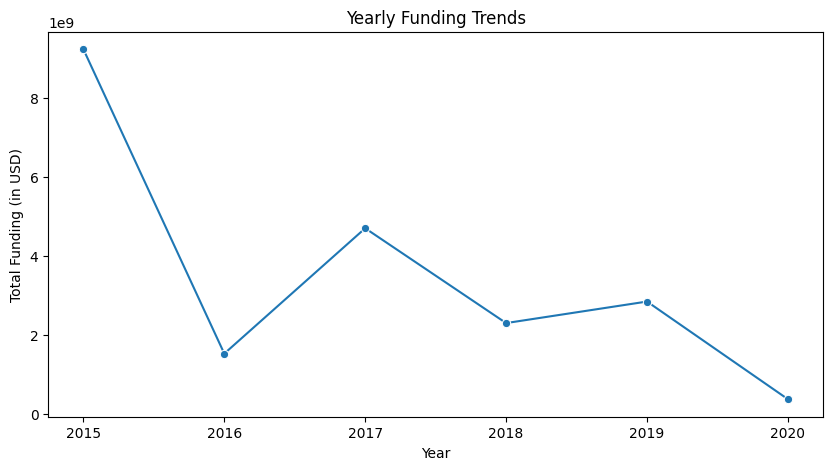

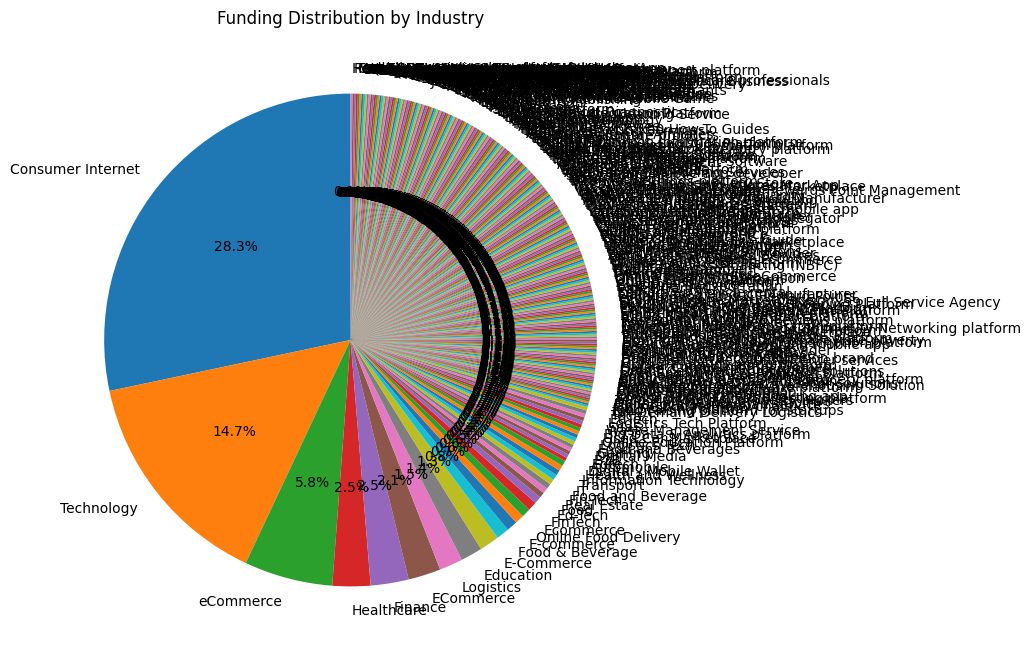

<ipython-input-68-fa76c6506c8e>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_counts, x='location', y='count', palette="viridis")


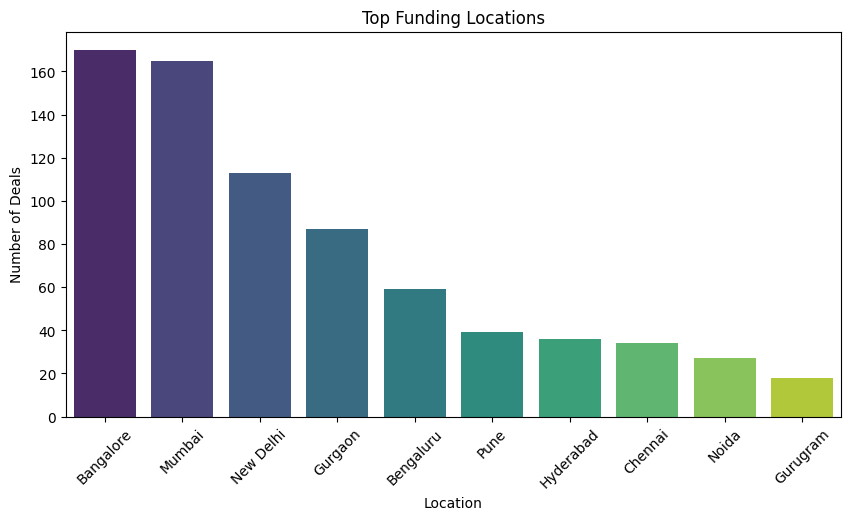

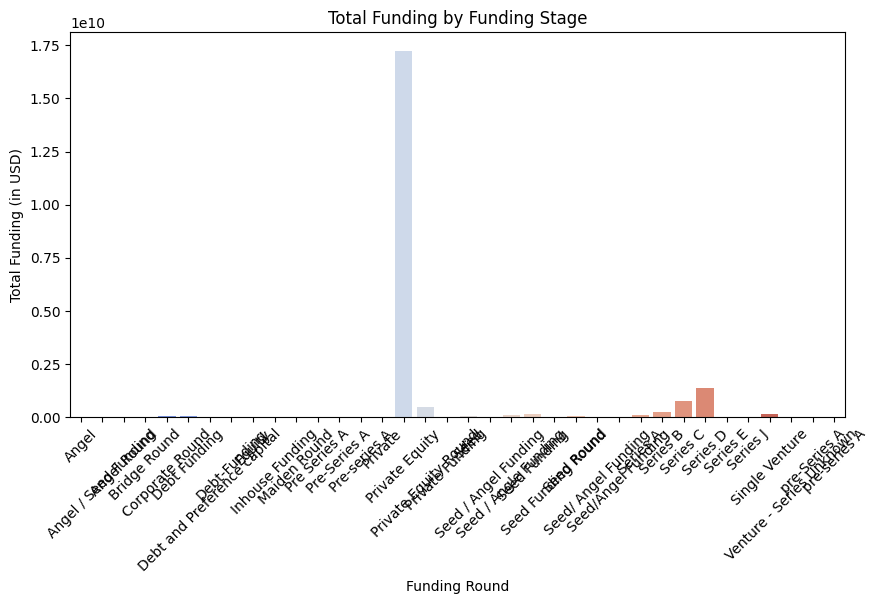

<ipython-input-68-fa76c6506c8e>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=investor_counts, x='lead_investor', y='count', palette="magma")


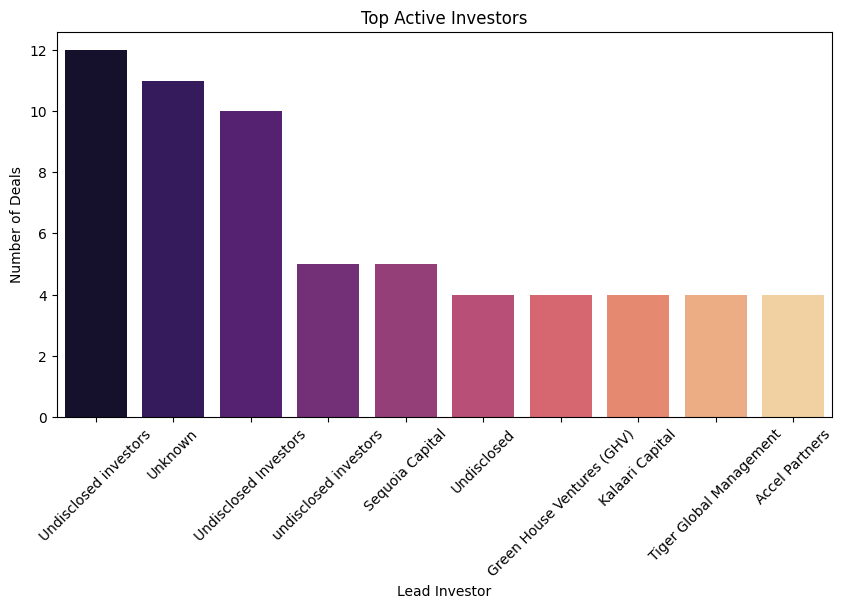

❗ Valuation data is missing or not applicable.


In [ ]:
analysis.basic_metrics()
analysis.funding_trends()
analysis.industry_distribution()
analysis.geographic_distribution()
analysis.funding_stage_analysis()
analysis.investor_activity()
analysis.custom_insight()